In [ ]:
import pandas as pd

In [34]:


def generate_signal(row):
    if row['Pred_Trend'] == 'Sideways':
        return 0
    elif row['Pred_Trend'] == 'Bear':
        return 2
    elif row['Pred_Trend'] == 'Bull':
        return 1
    else:
        return None  # or any other default value if needed


In [36]:
df = pd.read_csv('3m_rf_pred.csv')
df
# Apply the generate_signal function to create the 'Signal' column
# df['Signal'] = df.apply(generate_signal, axis=1)

ParserError: Error tokenizing data. C error: Expected 19 fields in line 912076, saw 24


In [23]:
# import pandas as pd

# # Load the BTC data and the remaining data
# btc_data = pd.read_csv('final\\btc_3m_18_24.csv')
# btc_data.drop_duplicates(subset=['timestamp'], inplace=True)
# btc_data.to_csv('final\\btc_3m_18_24.csv')
# !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 


/Users/vikasjaiswal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# df=pd.read_csv('btc1h_with_predictions.csv')
# df=df[['timestamp', 'open', 'high', 'low', 'close', 'Pred_Trend']]
# df.to_csv('btc1h_with_predictions.csv', index=False)
# df 

In [31]:
file= pd.read_csv('label_rf_1.csv') 
file
# file=pd.read_csv("signals.csv")


,Unnamed: 0,timestamp,open,high,low,close,volume,SMA,EMA,Log,Returns,rsi,cmf,bb_lower,bb_upper,period,Pred_Trend
0,47,01/01/19 02:24,3673.64,3677.80,3670.03,3673.68,41.733932,3703.988750,3726.776590,8.208949,0.000024,42.318667,0.070003,3670.269347,3680.890653,47,Sideways
1,48,01/01/19 02:27,3673.67,3675.50,3671.59,3672.00,44.392857,3702.505208,3726.231549,8.208492,-0.000056,41.264414,0.006070,3668.899053,3680.140947,48,Sideways
2,49,01/01/19 02:30,3672.00,3678.00,3672.00,3674.78,37.378320,3700.992500,3725.719593,8.209249,0.000092,43.761132,0.049362,3671.590613,3675.373387,49,Sideways
3,50,01/01/19 02:33,3674.30,3677.00,3673.02,3675.37,29.860092,3699.507917,3725.218602,8.209409,0.000020,44.302257,0.150279,3671.324125,3676.187875,50,Sideways
4,51,01/01/19 02:36,3675.36,3677.00,3674.98,3675.52,20.553034,3698.014792,3724.724089,8.209450,0.000005,44.448603,0.087766,3671.657170,3676.882830,51,Sideways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907935,908131,2024-03-16 15:42:00,68737.07,68761.10,68670.00,68721.10,73.084070,68403.090417,68317.220492,11.137812,-0.000021,54.995773,-0.091138,68623.815136,68945.848864,908131,Sideways
907936,908132,2024-03-16 17:06:00,68146.97,68266.06,68130.10,68220.00,123.987730,68402.465417,68316.253124,11.130493,-0.000657,43.081377,-0.078818,68192.136692,69149.535308,908132,Bear
907937,908133,2024-03-16 17:06:00,68146.97,68266.06,68130.10,68220.00,123.987730,68401.609167,68315.295381,11.130493,0.000000,43.081377,-0.052961,68025.507794,69028.580206,908133,Sideways
907938,908134,2024-03-16 17:12:00,68303.16,68388.22,68296.00,68310.36,90.839270,68402.896042,68315.246273,11.131817,0.000119,45.548407,-0.078640,67967.696519,68915.711481,908134,Sideways


In [32]:
# logs= file[['timestamp', 'open', 'high', 'low', 'close', 'Signal']].rename(columns= {'Signal': 'signal'})


# Logs 

In [33]:
logs= file[['timestamp', 'open', 'high', 'low', 'close', 'Signal']].rename(columns= {'Signal': 'signal'})

KeyError: "['Signal'] not in index"

In [26]:
logs= logs[logs['signal']!=0] 

In [29]:
logs['signal'].sum()
logs

,timestamp,open,high,low,close,signal
23,2019-01-01 03:30:00,3671.71,3671.71,3662.02,3662.79,2
208,2019-01-01 12:45:00,3705.92,3726.64,3705.73,3716.41,-2
209,2019-01-01 12:48:00,3716.39,3716.39,3705.00,3707.66,2
340,2019-01-01 19:21:00,3714.16,3756.94,3713.40,3734.95,-2
341,2019-01-01 19:24:00,3734.91,3734.94,3713.37,3714.57,2
...,...,...,...,...,...,...
907216,2024-03-04 08:33:00,64885.64,65080.44,64831.31,65074.00,1
907220,2024-03-04 08:45:00,65456.70,65456.70,65184.05,65256.20,-1
907226,2024-03-04 09:03:00,65203.99,65217.54,64738.74,64784.00,2
907231,2024-03-04 09:18:00,64894.56,65088.00,64894.56,65069.57,-2


# PNL

In [30]:
logs['entry_timestamp']= logs['timestamp'] 
logs['entry_price']= logs['close']
logs['exit_timestamp']= logs['timestamp'].shift(-1)
logs['exit_price']= logs['close'].shift(-1)
pnl= logs[logs['signal']>0][['entry_timestamp', 'entry_price', 'exit_timestamp', 'exit_price', 'signal']]
pnl 

,entry_timestamp,entry_price,exit_timestamp,exit_price,signal
23,2019-01-01 03:30:00,3662.79,2019-01-01 12:45:00,3716.41,2
209,2019-01-01 12:48:00,3707.66,2019-01-01 19:21:00,3734.95,2
341,2019-01-01 19:24:00,3714.57,2019-01-01 19:33:00,3710.27,2
360,2019-01-01 20:21:00,3698.00,2019-01-01 20:45:00,3684.07,2
373,2019-01-01 21:00:00,3688.44,2019-01-01 23:30:00,3678.00,1
...,...,...,...,...,...
907202,2024-03-04 07:51:00,63961.10,2024-03-04 08:06:00,64606.00,2
907210,2024-03-04 08:15:00,64655.01,2024-03-04 08:24:00,64994.49,2
907216,2024-03-04 08:33:00,65074.00,2024-03-04 08:45:00,65256.20,1
907226,2024-03-04 09:03:00,64784.00,2024-03-04 09:18:00,65069.57,2


In [20]:
pnl['profit_per_btc'] = np.where(pnl['signal'] == 1, pnl['exit_price'] - pnl['entry_price'], 
                                  np.where(pnl['signal'] == 2, pnl['entry_price'] - pnl['exit_price'], None)) 

In [21]:
pnl['capital']= 1000

pnl['#units']= pnl['capital']/pnl['entry_price']

pnl['profit_per_capital']= pnl['#units']*pnl['profit_per_btc']
pnl['tnc_cost']= 1
pnl['profit_after_tnc']= pnl['profit_per_capital']- pnl['tnc_cost']

pnl['cumulative_profit']= pnl['profit_after_tnc'].cumsum()
pnl['roe_%']= (pnl['profit_after_tnc']/pnl['capital'])*100

pnl.tail(50)

,entry_timestamp,entry_price,exit_timestamp,exit_price,signal,profit_per_btc,capital,#units,profit_per_capital,tnc_cost,profit_after_tnc,cumulative_profit,roe_%
905351,2024-02-29 11:30:00,62793.85,2024-02-29 11:51:00,63156.90,1,363.05,1000,0.015925,5.781617,1,4.781617,-33294.386825,0.478162
905363,2024-02-29 12:06:00,63154.96,2024-02-29 12:09:00,63333.95,2,-178.99,1000,0.015834,-2.83414,1,-3.83414,-33298.220965,-0.383414
905367,2024-02-29 12:18:00,63374.94,2024-02-29 12:36:00,63006.65,2,368.29,1000,0.015779,5.811288,1,4.811288,-33293.409678,0.481129
905376,2024-02-29 12:45:00,62947.26,2024-02-29 14:00:00,62666.62,2,280.64,1000,0.015886,4.458335,1,3.458335,-33289.951342,0.345834
905403,2024-02-29 14:06:00,62500.51,2024-02-29 14:18:00,62755.52,2,-255.01,1000,0.016000,-4.080127,1,-5.080127,-33295.031469,-0.508013
905416,2024-02-29 14:45:00,62580.01,2024-02-29 16:33:00,62818.01,2,-238.0,1000,0.015980,-3.803131,1,-4.803131,-33299.8346,-0.480313
905462,2024-02-29 17:03:00,63257.69,2024-02-29 17:06:00,63099.26,1,-158.43,1000,0.015808,-2.504518,1,-3.504518,-33303.339118,-0.350452
905465,2024-02-29 17:12:00,62909.40,2024-02-29 19:00:00,62585.29,2,324.11,1000,0.015896,5.152012,1,4.152012,-33299.187106,0.415201
905504,2024-02-29 19:09:00,62960.01,2024-02-29 19:12:00,62762.54,1,-197.47,1000,0.015883,-3.136435,1,-4.136435,-33303.323541,-0.413644
905518,2024-02-29 19:51:00,62989.85,2024-02-29 20:45:00,62856.80,2,133.05,1000,0.015876,2.112245,1,1.112245,-33302.211296,0.111225


In [22]:
net_profit= pnl['profit_after_tnc'].sum() 
net_profit 

-33437.742750956764

In [34]:
print("Median_Points_Captured: ", pnl['profit_per_btc'].median()) 
print("Average_Points_Captured: ", pnl['profit_per_btc'].mean())
print("Maximum_Points_Captured: ", pnl['profit_per_btc'].max())
print("Minimum_Points_Captured: ", pnl['profit_per_btc'].min()) 
print("Total_Points_Captured: ", pnl['profit_per_btc'].sum()) 

Median_Points_Captured:  125.20000000000073
Average_Points_Captured:  212.4115047258985
Maximum_Points_Captured:  4569.779999999999
Minimum_Points_Captured:  -1441.9800000000032
Total_Points_Captured:  4494627.4400000125


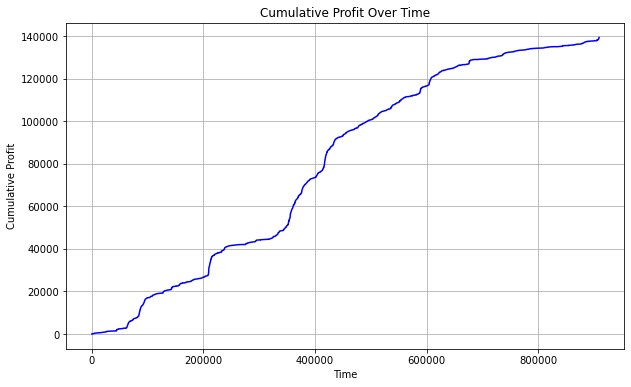

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the index to a numpy array 
index_array = np.array(pnl.index)

# Calculate cumulative profit 
plt.figure(figsize=(10, 6))
plt.plot(pnl['cumulative_profit'], color='blue', linestyle='-')
plt.title('Cumulative Profit Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()


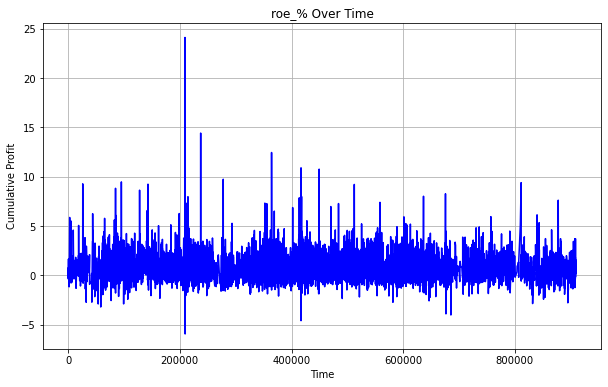

In [36]:
index_array = np.array(pnl.index)

# Calculate cumulative profit 
plt.figure(figsize=(10, 6))
plt.plot(pnl['roe_%'], color='blue', linestyle='-')
plt.title('roe_% Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.show()

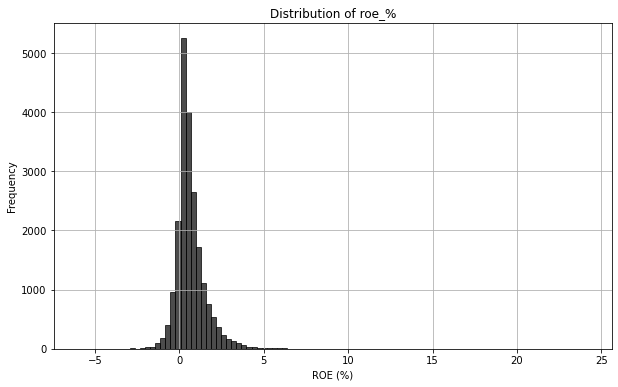

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(pnl['roe_%'], bins=100, color='black', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

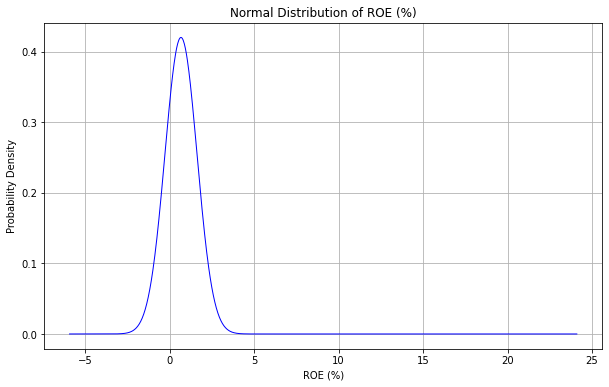

In [38]:
mu, std = np.mean(pnl['roe_%']), np.std(pnl['roe_%'])
xmin, xmax = np.min(pnl['roe_%']), np.max(pnl['roe_%'])
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, p, 'blue', linewidth=1)
plt.title('Normal Distribution of ROE (%)')
plt.xlabel('ROE (%)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

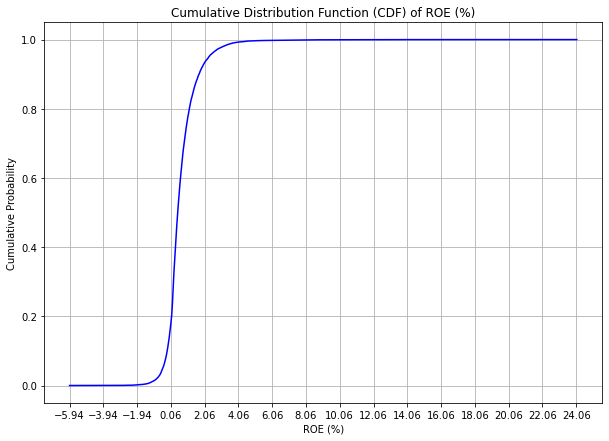

In [44]:
roe_sorted = np.sort(pnl['roe_%'])
cumulative_prob = np.arange(len(roe_sorted)) / len(roe_sorted)

# Plot CDF
plt.figure(figsize=(10, 7))
plt.plot(roe_sorted, cumulative_prob, color='blue', linestyle='-')
plt.title('Cumulative Distribution Function (CDF) of ROE (%)')
plt.xlabel('ROE (%)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Increase the interval of x-axis
plt.xticks(np.arange(min(roe_sorted), max(roe_sorted)+1, 2.0))  # Adjust the step size as needed

plt.show()


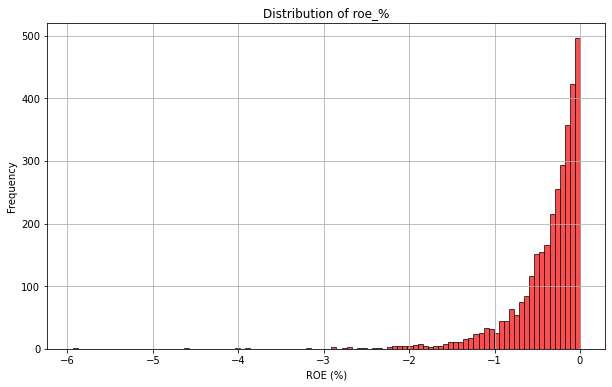

losing_roe_count 3274
median_when_losing_roe -0.2522366957559611


In [40]:
roe_less_than_zero= pnl[pnl['roe_%']<0]
plt.figure(figsize=(10, 6))
plt.hist(roe_less_than_zero['roe_%'], bins=100, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("losing_roe_count", len(roe_less_than_zero))
print("median_when_losing_roe", roe_less_than_zero['roe_%'].median())


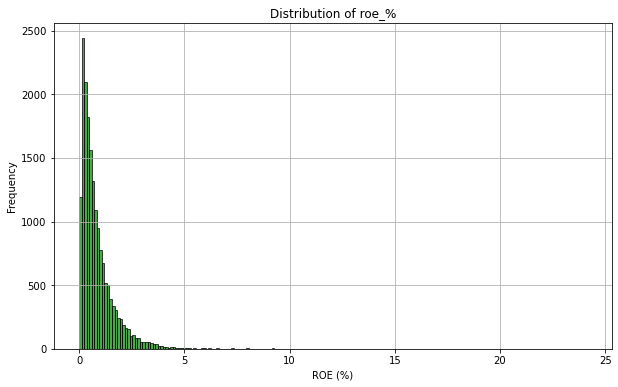

winning_roe_count 17886
median_when_losing_roe 0.5882936873204565


In [41]:
roe_greater_than_zero= pnl[pnl['roe_%']>0]
plt.figure(figsize=(10, 6))
plt.hist(roe_greater_than_zero['roe_%'], bins=200, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of roe_%')
plt.xlabel('ROE (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("winning_roe_count", len(roe_greater_than_zero))
print("median_when_losing_roe", roe_greater_than_zero['roe_%'].median())


# Accuracy Parameters

In [42]:
total_trades= len(pnl)
winning_trades= len(pnl[pnl['profit_after_tnc']>0])
losing_trades= total_trades - winning_trades 
accuracy_perc= (winning_trades/total_trades)*100
max_profit= pnl['profit_after_tnc'].max()
min_profit= pnl['profit_after_tnc'].min()
net_profit= pnl['profit_after_tnc'].sum()
long_positions= len(pnl[pnl['signal']==1])
short_positions= len(pnl[pnl['signal']==2])
profit_long_only= pnl[pnl['signal']==1]['profit_after_tnc'].sum()
profit_short_only= pnl[pnl['signal']==2]['profit_after_tnc'].sum()

net_return_long= pnl[pnl['signal']==1]['roe_%'].sum()
net_return_short= pnl[pnl['signal']==2]['roe_%'].sum()

In [43]:
print(" -----  3 min data results -------- ")
print("Total Trades:", total_trades)
print("Winning Trades:", winning_trades)
print("Losing Trades:", losing_trades)
print("Accuracy Percentage:", accuracy_perc)
print("Max Profit:", max_profit)
print("Min Profit:", min_profit)
print("Net Profit:", net_profit)
print("No of Long Positions:", long_positions)
print("No of Short Positions:", short_positions)

print("Net Profit Long:", profit_long_only) 

print("Net Profit Short:", profit_short_only)

print("Net Return % Long:", net_return_long)
print("Net Return % Short:", net_return_short)


 -----  3 min data results -------- 
Total Trades: 21161
Winning Trades: 17886
Losing Trades: 3275
Accuracy Percentage: 84.52341571759369
Max Profit: 241.0212585966294
Min Profit: -59.3910209927532
Net Profit: 139408.98344596894
No of Long Positions: 8611
No of Short Positions: 12550
Net Profit Long: 59416.51274906113
Net Profit Short: 79992.47069690759
Net Return % Long: 5941.651274906146
Net Return % Short: 7999.247069690729
